# Trabalho - DS I

### Análise dos dados da Liga Nacional de Basquete Americano

Source: https://www.nba.com/stats/

Glossary: https://www.nba.com/stats/help/glossary/

### Instalação de pacotes

In [103]:
#install.packages("magrittr")
#install.packages("tidyverse")
#install.packages("readxl")
#install.packages("kableExtra")
#install.packages("summarytools")
#install.packages("knitr")
#install.packages("sf")
#install.packages("ggplot2")
#install.packages("RColorBrewer")
#install.packages("ggspatial")
#install.packages("ddply")
#install.packages("corrplot")


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.89             FALSE



installing the source package 'corrplot'



### Import de bibliotecas

In [1]:
library(sf)           #Para lidar com dados espaciais 
library(RColorBrewer) #Para acessar paleta de cores
library(ggspatial)    #Para adicionar elementos de mapas

Warning message:
"package 'sf' was built under R version 3.6.3"Linking to GEOS 3.9.0, GDAL 3.2.1, PROJ 7.2.1
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'ggspatial' was built under R version 3.6.3"

In [104]:
library(corrplot)

corrplot 0.89 loaded


In [118]:
library(ggplot2)

In [1]:
library(knitr)
library(magrittr)
library(tidyverse)
library(readxl)
library(kableExtra)
library(summarytools)


Warning message:
"package 'knitr' was built under R version 3.6.3"Warning message:
"package 'magrittr' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.1 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::extract()   m

### Import de dados

In [2]:
games <- read_csv("../dataset/games.csv")
games_details <- read_csv("../dataset/games_details.csv")
players <- read_csv("../dataset/players.csv")
ranking <- read_csv("../dataset/ranking.csv")
teams <- read_csv("../dataset/teams.csv")
usa_states <- "../dataset/estados_USAt.shp"
nba_titles <- "../dataset/est_tit.csv"


-- Column specification --------------------------------------------------------
cols(
  .default = col_double(),
  GAME_DATE_EST = col_date(format = ""),
  GAME_STATUS_TEXT = col_character()
)
i Use `spec()` for the full column specifications.


-- Column specification --------------------------------------------------------
cols(
  .default = col_double(),
  TEAM_ABBREVIATION = col_character(),
  TEAM_CITY = col_character(),
  PLAYER_NAME = col_character(),
  START_POSITION = col_character(),
  COMMENT = col_character(),
  MIN = col_time(format = "")
)
i Use `spec()` for the full column specifications.

Warning message:
"25009 parsing failures.
 row col       expected actual                           file
1521 MIN valid duration  27:60 '../dataset/games_details.csv'
2058 MIN valid duration  10:60 '../dataset/games_details.csv'
2071 MIN valid duration  11:60 '../dataset/games_details.csv'
2323 MIN valid duration  36:60 '../dataset/games_details.csv'
2570 MIN valid duration  19:60 '..

### Glossário

#### Tabela - Games: 

- GAME_DATE_EST: Game's date
- GAME_ID: ID of the game
- GAME_STATUS_TEXT: Status final means that the  game is completed
- HOME_TEAM_ID: ID of the home team
- VISITOR_TEAM_ID: ID of the visitor team
- SEASON: Season when the game occured
- TEAM_ID_home: ID of the home team (dupplicate of HOME_TEAM_ID)
- PTS_home: Number of points scored by home team
- FG_PCT_home: Field Goal Percentage home team
- FT_PCT_home: Free Throw Percentage of the home team
- FG3_PCT_home: Three Point Percentageof the home team
- AST_home: Assists of the home team
- REB_home: Rebounds of the home team
- TEAM_ID_away: ID of the away team (dupplicate of VISITOR_TEAM_ID)
- PTS_away: Number of points scored by away team
- FG_PCT_away: Field Goal Percentage away team
- FT_PCT_away: Free Throw Percentage of the away team
- FG3_PCT_away: Three Point Percentage of the away team
- AST_away: Assists of the away team
- REB_away: Rebounds of the away team
- HOME_TEAM_WINS: If home team won the game

#### Tabela - Games_details

- GAME_ID: ID of the game
- TEAM_ID: ID of the team
- TEAM_ABBREVIATION: Team's abbreviation
- TEAM_CITY: City where the game was played
- PLAYER_ID: ID of the player
- PLAYER_NAME: Player's name
- START_POSITION: Position of the player (if nothing then he's on the bench)
- COMMENT: Comment
- MIN: Minutes played
- FGM: Field Goals Made
- FGA: Field Goals Attempted
- FG_PCT: Field Goal Percentage
- FG3M: Three Pointers Made
- FG3A: Three Pointers Attempted
- FG3_PCT: Three Point Percentage
- FTM: Free Throws Made
- FTA: Free Throws Attempted
- FT_PCT: Free Throw Percentage
- OREB: Offensive Rebounds
- DREB: Defensive Rebounds
- REB: Rebounds
- AST: Assists
- STL: Steals
- BLK: Blocked shots
- TO: Turnovers
- PF: Personnal Foul
- PTS: Number of points scored by the player
- PLUS_MINUS: Plus - Minus

#### Tabela - players

- PLAYER_NAME: Player's name
- TEAM_ID: ID of the team
- PLAYER_ID: ID of the player
- SEASON: Season

#### Tabela - ranking

- TEAM_ID: ID of the team
- LEAGUE_ID: ID of the league (here only NBA)
- SEASON_ID: Season
- STANDINGSDATE: Standings date
- CONFERENCE: Conference (west or east)
- TEAM: Team name
- G: Number of games played on the season
- W: Number of winning games on the season
- L: Number of loosing games on the season
- W_PCT: Win %
- HOME_RECORD: Home record on the season
- ROAD_RECORD: Road record on the season
- RETURNTOPLAY(empty column)

#### Tabela - teams

- LEAGUE_ID: ID of the league (here only NBA)
- TEAM_ID: ID of the team
- MIN_YEAR: Minimum year of the team into NBA championship
- MAX_YEAR: Maximum year of the team into NBA championship
- ABBREVIATION: Abbreviation of team name
- NICKNAME: Team's nickname
- YEARFOUNDED: Founded Year
- CITY: Team's city
- ARENA: Team's stadium
- ARENACAPACITY: Capacity of the stadium
- OWNER: Owner of the team (last one)
- GENERALMANAGER: General manager
- HEADCOACH: Head coach
- DLEAGUEAFFILIATION: League Affiliation

### Verificando tabelas

In [4]:
head(games)
head(games_details)
head(players)
head(ranking)
head(teams)

GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
2021-03-21,22000645,Final,1610612748,1610612754,2020,1610612748,106,0.402,0.826,...,27,51,1610612754,109,0.388,0.900,0.333,27,50,0
2021-03-21,22000016,Final,1610612745,1610612760,2020,1610612745,112,0.494,0.741,...,22,38,1610612760,114,0.462,0.680,0.333,22,52,0
2021-03-21,22000646,Final,1610612743,1610612740,2020,1610612743,108,0.500,0.800,...,30,37,1610612740,113,0.482,0.767,0.286,26,45,0
2021-03-21,22000167,Final,1610612738,1610612753,2020,1610612738,112,0.455,1.000,...,27,45,1610612753,96,0.381,0.700,0.324,20,44,1
2021-03-21,22000647,Final,1610612751,1610612764,2020,1610612751,113,0.489,0.727,...,24,35,1610612764,106,0.532,0.789,0.333,24,43,1
2021-03-21,22000648,Final,1610612739,1610612761,2020,1610612739,116,0.506,0.750,...,29,54,1610612761,105,0.389,0.842,0.326,19,37,1


GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
22000645,1610612754,IND,Indiana,203200,Justin Holiday,F,NA,41:45:00,5,...,0,5,5,2,2,2,2,2,15,8
22000645,1610612754,IND,Indiana,1627734,Domantas Sabonis,F,NA,35:06:00,5,...,2,9,11,1,3,0,5,6,17,-2
22000645,1610612754,IND,Indiana,1626167,Myles Turner,C,NA,29:58:00,4,...,1,5,6,1,0,5,2,3,16,6
22000645,1610612754,IND,Indiana,1627747,Caris LeVert,G,NA,34:42:00,5,...,0,3,3,3,1,0,0,1,13,1
22000645,1610612754,IND,Indiana,1627763,Malcolm Brogdon,G,NA,40:35:00,4,...,3,3,6,10,1,0,2,1,12,6
22000645,1610612754,IND,Indiana,203926,Doug McDermott,NA,NA,19:01:00,7,...,2,5,7,2,0,0,1,4,15,2


PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
Royce O'Neale,1610612762,1626220,2019
Bojan Bogdanovic,1610612762,202711,2019
Rudy Gobert,1610612762,203497,2019
Donovan Mitchell,1610612762,1628378,2019
Mike Conley,1610612762,201144,2019
Joe Ingles,1610612762,204060,2019


TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1610612762,00,22020,2021-03-21,West,Utah,41,30,11,0.732,16-2,14-9,NA
1610612756,00,22020,2021-03-21,West,Phoenix,41,28,13,0.683,15-8,13-5,NA
1610612747,00,22020,2021-03-21,West,L.A. Lakers,43,28,15,0.651,14-9,14-6,NA
1610612746,00,22020,2021-03-21,West,LA Clippers,43,27,16,0.628,14-6,13-10,NA
1610612743,00,22020,2021-03-21,West,Denver,42,25,17,0.595,12-9,13-8,NA
1610612757,00,22020,2021-03-21,West,Portland,42,25,17,0.595,14-8,11-9,NA


LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
00,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
00,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
00,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NA,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
00,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
00,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
00,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate


In [58]:
df <- teams %>%
        filter(TEAM_ID == 1610612759)

df

LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
00,1610612759,1976,2019,SAS,Spurs,1976,San Antonio,AT&T Center,18694,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs


In [3]:
glimpse(games)

Rows: 24,195
Columns: 21
$ GAME_DATE_EST    <date> 2021-03-21, 2021-03-21, 2021-03-21, 2021-03-21, 2021~
$ GAME_ID          <dbl> 22000645, 22000016, 22000646, 22000167, 22000647, 220~
$ GAME_STATUS_TEXT <chr> "Final", "Final", "Final", "Final", "Final", "Final",~
$ HOME_TEAM_ID     <dbl> 1610612748, 1610612745, 1610612743, 1610612738, 16106~
$ VISITOR_TEAM_ID  <dbl> 1610612754, 1610612760, 1610612740, 1610612753, 16106~
$ SEASON           <dbl> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,~
$ TEAM_ID_home     <dbl> 1610612748, 1610612745, 1610612743, 1610612738, 16106~
$ PTS_home         <dbl> 106, 112, 108, 112, 113, 116, 86, 100, 111, 92, 94, 1~
$ FG_PCT_home      <dbl> 0.402, 0.494, 0.500, 0.455, 0.489, 0.506, 0.390, 0.43~
$ FT_PCT_home      <dbl> 0.826, 0.741, 0.800, 1.000, 0.727, 0.750, 0.720, 0.56~
$ FG3_PCT_home     <dbl> 0.243, 0.368, 0.353, 0.426, 0.310, 0.515, 0.160, 0.45~
$ AST_home         <dbl> 27, 22, 30, 27, 24, 29, 20, 16, 30, 17, 18, 24, 25, 2~
$ REB_home     

In [4]:
glimpse(games_details)

Rows: 602,767
Columns: 28
$ GAME_ID           <dbl> 22000645, 22000645, 22000645, 22000645, 22000645, 22~
$ TEAM_ID           <dbl> 1610612754, 1610612754, 1610612754, 1610612754, 1610~
$ TEAM_ABBREVIATION <chr> "IND", "IND", "IND", "IND", "IND", "IND", "IND", "IN~
$ TEAM_CITY         <chr> "Indiana", "Indiana", "Indiana", "Indiana", "Indiana~
$ PLAYER_ID         <dbl> 203200, 1627734, 1626167, 1627747, 1627763, 203926, ~
$ PLAYER_NAME       <chr> "Justin Holiday", "Domantas Sabonis", "Myles Turner"~
$ START_POSITION    <chr> "F", "F", "C", "G", "G", NA, NA, NA, NA, NA, NA, NA,~
$ COMMENT           <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, "DNP - Coach~
$ MIN               <time> 41:45:00, 35:06:00, 29:58:00, 34:42:00, 40:35:00, 1~
$ FGM               <dbl> 5, 5, 4, 5, 4, 7, 5, 1, 1, 1, NA, NA, NA, NA, NA, 7,~
$ FGA               <dbl> 11, 13, 8, 18, 17, 10, 7, 4, 7, 3, NA, NA, NA, NA, N~
$ FG_PCT            <dbl> 0.455, 0.385, 0.500, 0.278, 0.235, 0.700, 0.714, 0.2~
$ FG3M        

In [5]:
glimpse(players)

Rows: 7,228
Columns: 4
$ PLAYER_NAME <chr> "Royce O'Neale", "Bojan Bogdanovic", "Rudy Gobert", "Donov~
$ TEAM_ID     <dbl> 1610612762, 1610612762, 1610612762, 1610612762, 1610612762~
$ PLAYER_ID   <dbl> 1626220, 202711, 203497, 1628378, 201144, 204060, 202334, ~
$ SEASON      <dbl> 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019~


In [5]:
glimpse(teams)

Rows: 30
Columns: 14
$ LEAGUE_ID          <chr> "00", "00", "00", "00", "00", "00", "00", "00", "00~
$ TEAM_ID            <dbl> 1610612737, 1610612738, 1610612740, 1610612741, 161~
$ MIN_YEAR           <dbl> 1949, 1946, 2002, 1966, 1980, 1976, 1967, 1970, 194~
$ MAX_YEAR           <dbl> 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 201~
$ ABBREVIATION       <chr> "ATL", "BOS", "NOP", "CHI", "DAL", "DEN", "HOU", "L~
$ NICKNAME           <chr> "Hawks", "Celtics", "Pelicans", "Bulls", "Mavericks~
$ YEARFOUNDED        <dbl> 1949, 1946, 2002, 1966, 1980, 1976, 1967, 1970, 194~
$ CITY               <chr> "Atlanta", "Boston", "New Orleans", "Chicago", "Dal~
$ ARENA              <chr> "State Farm Arena", "TD Garden", "Smoothie King Cen~
$ ARENACAPACITY      <dbl> 18729, 18624, NA, 21711, 19200, 19099, 18104, 19060~
$ OWNER              <chr> "Tony Ressler", "Wyc Grousbeck", "Tom Benson", "Jer~
$ GENERALMANAGER     <chr> "Travis Schlenk", "Danny Ainge", "Trajan Langdon", ~
$ HEADCOACH        

In [6]:
glimpse(ranking)

Rows: 191,112
Columns: 13
$ TEAM_ID       <dbl> 1610612762, 1610612756, 1610612747, 1610612746, 16106127~
$ LEAGUE_ID     <chr> "00", "00", "00", "00", "00", "00", "00", "00", "00", "0~
$ SEASON_ID     <dbl> 22020, 22020, 22020, 22020, 22020, 22020, 22020, 22020, ~
$ STANDINGSDATE <date> 2021-03-21, 2021-03-21, 2021-03-21, 2021-03-21, 2021-03~
$ CONFERENCE    <chr> "West", "West", "West", "West", "West", "West", "West", ~
$ TEAM          <chr> "Utah", "Phoenix", "L.A. Lakers", "LA Clippers", "Denver~
$ G             <dbl> 41, 41, 43, 43, 42, 42, 39, 41, 43, 39, 42, 42, 42, 41, ~
$ W             <dbl> 30, 28, 28, 27, 25, 25, 22, 22, 22, 19, 18, 18, 17, 11, ~
$ L             <dbl> 11, 13, 15, 16, 17, 17, 17, 19, 21, 20, 24, 24, 25, 30, ~
$ W_PCT         <dbl> 0.732, 0.683, 0.651, 0.628, 0.595, 0.595, 0.564, 0.537, ~
$ HOME_RECORD   <chr> "16-2", "15-8", "14-9", "14-6", "12-9", "14-8", "10-10",~
$ ROAD_RECORD   <chr> "14-9", "13-5", "14-6", "13-10", "13-8", "11-9", "12-7",~
$ RETURNTOPLAY

In [10]:
top10 <- ranking %>%
    group_by(TEAM_ID) %>%
    summarise(per_W=sum(W)/sum(G)) %>%
    inner_join(teams, by = "TEAM_ID") %>%
    arrange(desc(per_W))
    #knitr::kable(col.names = c("NICKNAME", "per_W"))

head(top10, 10)

TEAM_ID,per_W,LEAGUE_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
1610612759,0.6843183,00,1976,2019,SAS,Spurs,1976,San Antonio,AT&T Center,18694,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
1610612745,0.5965185,00,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
1610612742,0.5869039,00,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
1610612738,0.5690926,00,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
1610612748,0.5668913,00,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce
1610612743,0.5608854,00,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
1610612760,0.5549785,00,1967,2019,OKC,Thunder,1967,Oklahoma City,Chesapeake Energy Arena,19163,Clay Bennett,Sam Presti,Billy Donovan,Oklahoma City Blue
1610612744,0.5409769,00,1946,2019,GSW,Warriors,1946,Golden State,Chase Center,19596,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors
1610612754,0.5363205,00,1976,2019,IND,Pacers,1976,Indiana,Bankers Life Fieldhouse,18345,Herb Simon,Kevin Pritchard,Nate McMillan,Fort Wayne Mad Ants
1610612747,0.5334225,00,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers


### Melhores time e Jogadores que mais pontuaram 

In [57]:
base<-inner_join(ranking,teams,by="TEAM_ID")

base2<-inner_join(games_details,games,by="GAME_ID")

MaioresVitWest<-base %>%
  select(CONFERENCE,TEAM,SEASON_ID,G,W_PCT,)%>%
    filter(G==82)%>%
    filter(CONFERENCE=="West") %>%
      group_by(CONFERENCE,TEAM,SEASON_ID,G,W_PCT)%>%
        summarise(max = max(W_PCT)) %>%
            arrange(desc(max))
          
head(MaioresVitWest) 



MaioresVitEast<-base %>%
  select(CONFERENCE,TEAM,SEASON_ID,G,W_PCT,)%>%
    filter(G==82)%>%
    filter(CONFERENCE=="East") %>%
      group_by(CONFERENCE,TEAM,SEASON_ID,G,W_PCT)%>%
        summarise(max = max(W_PCT)) %>%
            arrange(desc(max))
          
head(MaioresVitEast)


MaioresJog<-base2 %>%
  filter(SEASON>2003)%>%
  select(GAME_ID,TEAM_ID,PLAYER_NAME,PLAYER_ID,SEASON,PTS)%>%
  group_by(PLAYER_NAME)%>%
  summarise(Pontos=sum(PTS,na.rm=TRUE),
            Partidas=(GAME_ID=n()),
            MedPts=round(((Pontos/Partidas)),0))%>%
              arrange(desc(Pontos))

head(MaioresJog)

`summarise()` has grouped output by 'CONFERENCE', 'TEAM', 'SEASON_ID', 'G'. You can override using the `.groups` argument.


CONFERENCE,TEAM,SEASON_ID,G,W_PCT,max
West,Golden State,22015,82,0.890,0.890
West,Dallas,22006,82,0.817,0.817
West,Golden State,22014,82,0.817,0.817
West,Golden State,22016,82,0.817,0.817
West,San Antonio,22015,82,0.817,0.817
West,Houston,22017,82,0.793,0.793


`summarise()` has grouped output by 'CONFERENCE', 'TEAM', 'SEASON_ID', 'G'. You can override using the `.groups` argument.


CONFERENCE,TEAM,SEASON_ID,G,W_PCT,max
East,Boston,22007,82,0.805,0.805
East,Cleveland,22008,82,0.805,0.805
East,Miami,22012,82,0.805,0.805
East,Detroit,22005,82,0.780,0.780
East,Boston,22008,82,0.756,0.756
East,Chicago,22010,82,0.756,0.756


PLAYER_NAME,Pontos,Partidas,MedPts
LeBron James,42412,1612,26
Kevin Durant,28891,1095,26
Carmelo Anthony,28507,1324,22
Dwyane Wade,26859,1284,21
James Harden,26238,1089,24
Dirk Nowitzki,26082,1290,20


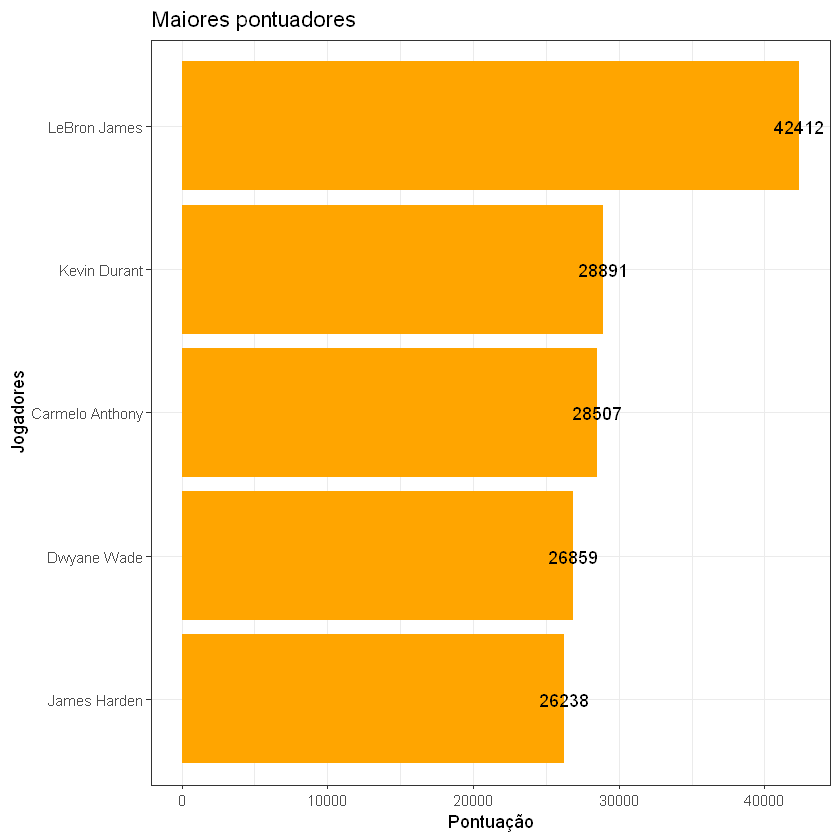

In [22]:
head(MaioresJog,5) %>%
mutate(PLAYER_NAME=fct_reorder(PLAYER_NAME, Pontos)) %>%
    ggplot(aes(x=PLAYER_NAME, y=Pontos)) +
    geom_bar(stat="identity", fill="orange") + 
    geom_text(aes(label=format(Pontos)),  color="black") +
    coord_flip() +
    ggtitle("Maiores pontuadores") +
    xlab("Jogadores") +
    ylab("Pontuação") +
    theme_bw()

### Mapa de títulos


-- Column specification --------------------------------------------------------
cols(
  NAME = col_character(),
  Titulo = col_double()
)

Joining, by = "NAME"
Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
"st_point_on_surface may not give correct results for longitude/latitude data"Scale on map varies by more than 10%, scale bar may be inaccurate


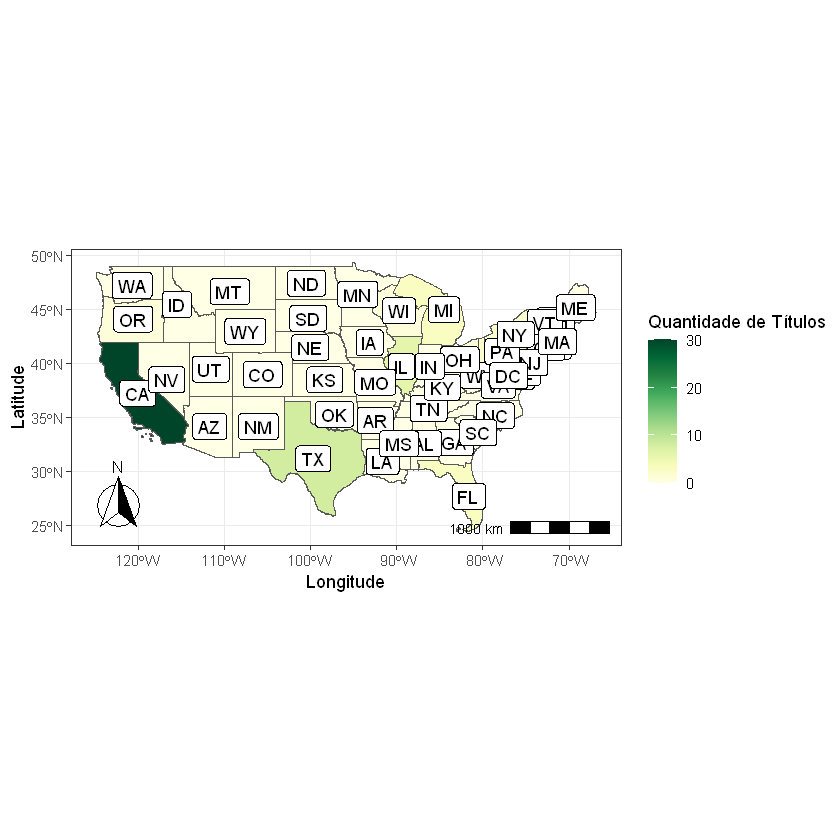

In [21]:
mapa <- read_sf(usa_states,options="ENCODING=WINDOWS-1252")


est_tit <- read_delim(nba_titles, ";")

mapaClass <-left_join(mapa,est_tit)

mapaClass$Titulo[is.na(mapaClass$Titulo)] <- 0

ggplot(mapaClass)+ #Inserindo os dados 
  geom_sf(aes(fill=Titulo), size = 0.05)+ #Criando um mapa para mostrar o número de habitantes para cada setor censitário [V002]
  scale_fill_gradientn(colours = brewer.pal(9,'YlGn'),na.value = "grey50")+ #Definindo uma nova paleta de cores
  geom_sf_label(aes(label=STUSPS),)+
  labs(x="Longitude",y="Latitude",fill="Quantidade de Títulos")+ #Definindo o título da escala de cores
  theme_minimal()+ #Definindo o tema do mapa
  annotation_north_arrow(style = north_arrow_fancy_orienteering)+
  annotation_scale(location="br")+
  theme_bw()

In [ ]:
ranking_total <- ranking %>%
    group_by(TEAM_ID) %>%
    summarise(per_W=(sum(W)/sum(G)) * 100) %>%
    inner_join(teams, by = "TEAM_ID") %>%
    select(NICKNAME, per_W) %>%
    arrange(desc(per_W)) 

ranking_total %>%
 mutate(NICKNAME=fct_reorder(NICKNAME, per_W)) %>%
 slice_head(n=10) %>%
 ggplot(aes(x=NICKNAME, y=per_W),width = 3, height = 3, dpi = 300, filename="racking.png") +
    geom_bar(stat="identity", fill="orange") + 
    geom_text(aes(label=format(per_W, nsmall=2, decimal=",")), color="black") +
    coord_flip() +
    ggtitle("Ranking") +
    xlab("Times") +
    ylab("Aproveitamento (% de vitórias)") +
    theme_bw()

### Tabela resumo - Ranking

In [19]:
summary(ranking['G'])
summary(ranking['W'])  
summary(ranking['W_PCT'])
summary(ranking['L'])

       G        
 Min.   : 0.00  
 1st Qu.:32.00  
 Median :67.00  
 Mean   :56.76  
 3rd Qu.:82.00  
 Max.   :82.00  

       W        
 Min.   : 0.00  
 1st Qu.:14.00  
 Median :28.00  
 Mean   :28.38  
 3rd Qu.:42.00  
 Max.   :73.00  

     W_PCT       
 Min.   :0.0000  
 1st Qu.:0.3680  
 Median :0.5000  
 Mean   :0.4925  
 3rd Qu.:0.6210  
 Max.   :1.0000  

       L        
 Min.   : 0.00  
 1st Qu.:14.00  
 Median :28.00  
 Mean   :28.38  
 3rd Qu.:41.00  
 Max.   :72.00  

### Tabela resumo - Ranking

In [63]:
G <-ranking %>%
      summarise(media = mean(G, na.rm = TRUE), 
        dp = round( sd(G, na.rm = TRUE), 2), min = min(G, na.rm = TRUE), 
        max = max(G, na.rm = TRUE), 
        mediana = median(G, na.rm = TRUE),Q1=quantile(G, probs = 0.25),
                Q2=quantile(G, probs = 0.50),
                Q3=quantile(G, probs = 0.75))

W <-ranking %>%
      summarise(media = mean(W, na.rm = TRUE), 
        dp = round( sd(W, na.rm = TRUE), 2), min = min(W, na.rm = TRUE), 
        max = max(W, na.rm = TRUE), 
        mediana = median(W, na.rm = TRUE),Q1=quantile(W, probs = 0.25),
                Q2=quantile(W, probs = 0.50),
                Q3=quantile(W, probs = 0.75))

L <-ranking %>%
      summarise(media = mean(L, na.rm = TRUE), 
        dp = round( sd(L, na.rm = TRUE), 2), min = min(L, na.rm = TRUE), 
        max = max(L, na.rm = TRUE), 
        mediana = median(L, na.rm = TRUE),Q1=quantile(L, probs = 0.25),
                Q2=quantile(L, probs = 0.50),
                Q3=quantile(L, probs = 0.75))

In [64]:
G
W
L

media,dp,min,max,mediana,Q1,Q2,Q3
56.76106,28.73,0,82,67,32,67,82


media,dp,min,max,mediana,Q1,Q2,Q3
28.38428,17.36,0,73,28,14,28,42


media,dp,min,max,mediana,Q1,Q2,Q3
28.37678,17.35,0,72,28,14,28,41


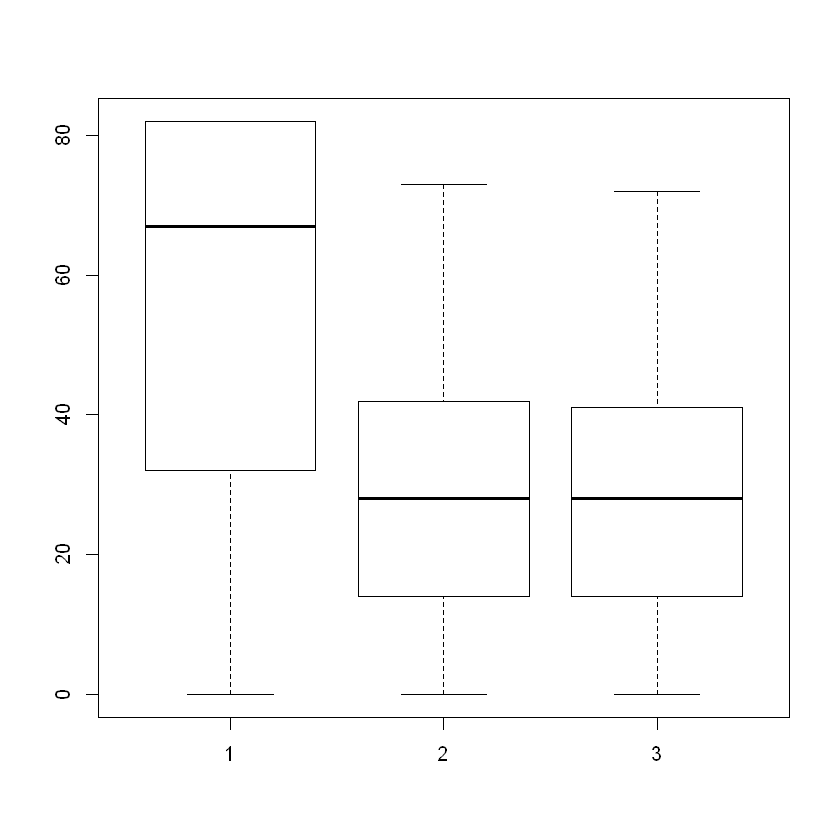

In [81]:
boxplot(ranking$G,ranking$W,ranking$L)

### Tabela resumo - Lakers

In [82]:
#ranking_df[ranking_df['TEAM_ID'] == 1610612747].describe()

G <-ranking %>%
  group_by(TEAM_ID) %>% 
    filter(TEAM_ID==1610612747) %>%
      summarise(media = mean(G, na.rm = TRUE), 
        dp = round( sd(G, na.rm = TRUE), 2), min = min(G, na.rm = TRUE), 
        max = max(G, na.rm = TRUE), 
        mediana = median(G, na.rm = TRUE),Q1=quantile(G, probs = 0.25),
                Q2=quantile(G, probs = 0.50),
                Q3=quantile(G, probs = 0.75))

W <-ranking %>%
  group_by(TEAM_ID) %>% 
    filter(TEAM_ID==1610612747) %>%
      summarise(media = mean(W, na.rm = TRUE), 
        dp = round( sd(W, na.rm = TRUE), 2), min = min(W, na.rm = TRUE), 
        max = max(W, na.rm = TRUE), 
        mediana = median(W, na.rm = TRUE),Q1=quantile(W, probs = 0.25),
                Q2=quantile(W, probs = 0.50),
                Q3=quantile(W, probs = 0.75))

L <-ranking %>%
  group_by(TEAM_ID) %>% 
    filter(TEAM_ID==1610612747) %>%
      summarise(media = mean(L, na.rm = TRUE), 
        dp = round( sd(L, na.rm = TRUE), 2), min = min(L, na.rm = TRUE), 
        max = max(L, na.rm = TRUE), 
        mediana = median(L, na.rm = TRUE), Q1=quantile(L, probs = 0.25),
                Q2=quantile(L, probs = 0.50),
                Q3=quantile(L, probs = 0.75))

In [83]:
G
W
L

TEAM_ID,media,dp,min,max,mediana,Q1,Q2,Q3
1610612747,56.8325,28.63,0,82,68,32,68,82


TEAM_ID,media,dp,min,max,mediana,Q1,Q2,Q3
1610612747,30.31573,18.47,0,65,30,16,30,45


TEAM_ID,media,dp,min,max,mediana,Q1,Q2,Q3
1610612747,26.51677,18.04,0,65,25,12,25,40


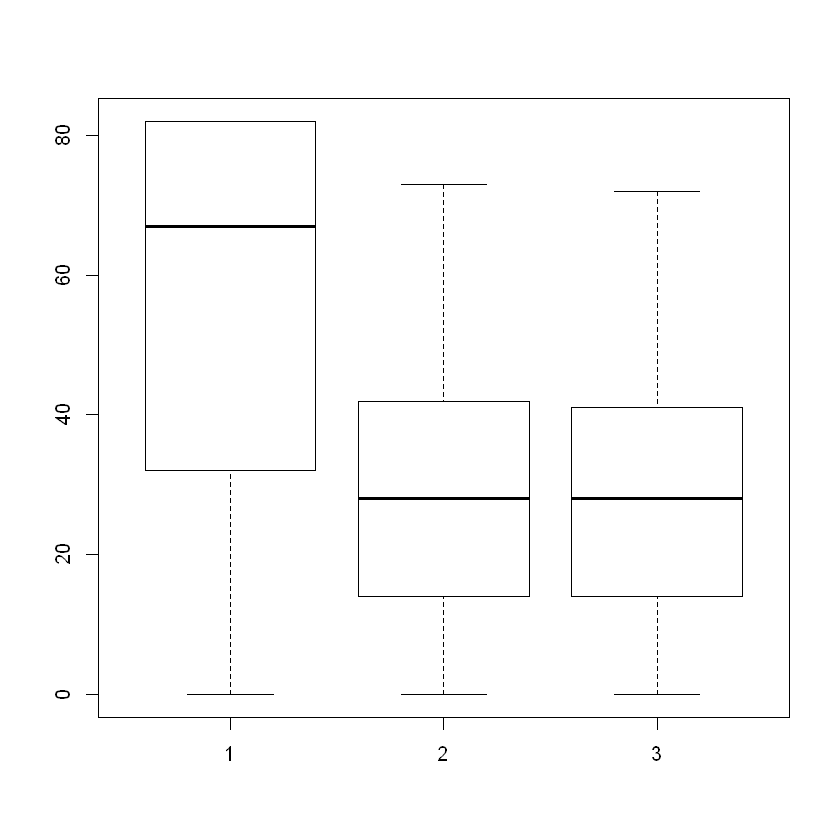

In [84]:
boxplot(ranking$G,ranking$W,ranking$L)

### Lakers Mandante

In [94]:
lakers_home <-games %>%
  group_by(HOME_TEAM_ID) %>% 
    filter(HOME_TEAM_ID==1610612747) %>%
      summarise(media_vitorias = mean(HOME_TEAM_WINS, na.rm = TRUE), 
        dp = round( sd(HOME_TEAM_WINS, na.rm = TRUE), 2),
               media_pts_lakers = mean(PTS_home, na.rm = TRUE), 
        dp_pts = round( sd(PTS_home, na.rm = TRUE), 2),
               media_pts_visitante = mean(PTS_away, na.rm = TRUE), 
        dp_pts_vis = round( sd(PTS_away, na.rm = TRUE), 2))
lakers_home

HOME_TEAM_ID,media_vitorias,dp,media_pts_lakers,dp_pts,media_pts_visitante,dp_pts_vis
1610612747,0.6015713,0.49,103.9513,12.42,100.8267,13.07


### Lakers - Visitante

In [98]:
lakers_away <-games %>%
  group_by(VISITOR_TEAM_ID) %>% 
    filter(VISITOR_TEAM_ID==1610612747) %>%
      summarise(media_vitorias_mandante = 1-mean(HOME_TEAM_WINS, na.rm = TRUE), 
        dp = round( sd(HOME_TEAM_WINS, na.rm = TRUE), 2),
               media_pts_lakers = mean(PTS_away, na.rm = TRUE), 
        dp_pts_lakers = round( sd(PTS_home, na.rm = TRUE), 2),
               media_pts_mandante = mean(PTS_home, na.rm = TRUE), 
        dp_pts_mandante = round( sd(PTS_away, na.rm = TRUE), 2))
lakers_away

VISITOR_TEAM_ID,media_vitorias_mandante,dp,media_pts_lakers,dp_pts_lakers,media_pts_mandante,dp_pts_mandante
1610612747,0.4423321,0.5,101.7947,12.41,104.5906,12.54


### Times mais derrotados pelos lakers em Los Angeles

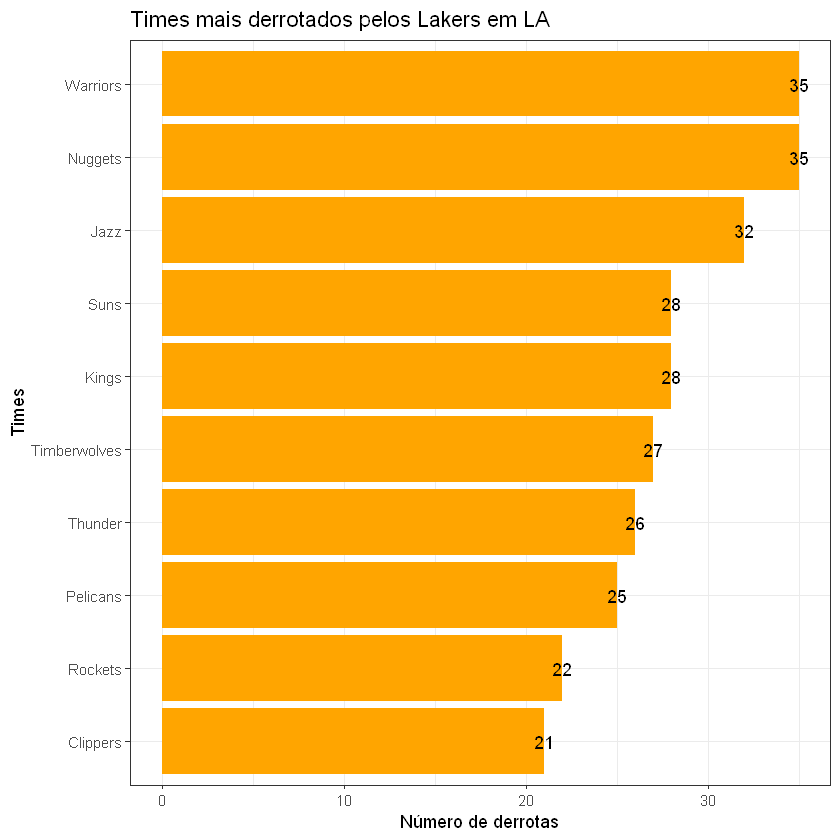

In [228]:
lakers_home <-games %>%
  group_by(HOME_TEAM_ID) %>% 
    select(HOME_TEAM_ID, TEAM_ID = VISITOR_TEAM_ID, HOME_TEAM_WINS) %>%
        filter(HOME_TEAM_ID==1610612747)
        

lakers_home_join <- inner_join(lakers_home, teams, by="TEAM_ID")
derrotas <- lakers_home_join %>% 
                group_by(NICKNAME) %>% 
                    summarise(Derrotas = sum(HOME_TEAM_WINS)) %>%
                        arrange(desc(Derrotas)) %>% slice(1:10)


derrotas %>%
    mutate(NICKNAME=fct_reorder(NICKNAME, Derrotas)) %>%
    ggplot(aes(x=NICKNAME, y=Derrotas)) +
    geom_bar(stat="identity", fill="orange") + 
    geom_text(aes(label=format(Derrotas)),  color="black") +
    coord_flip() +
    ggtitle("Times mais derrotados pelos Lakers em LA") +
    xlab("Times") +
    ylab("Número de derrotas") +
    theme_bw()

### Times que mais derrotaram os Lakers em LA

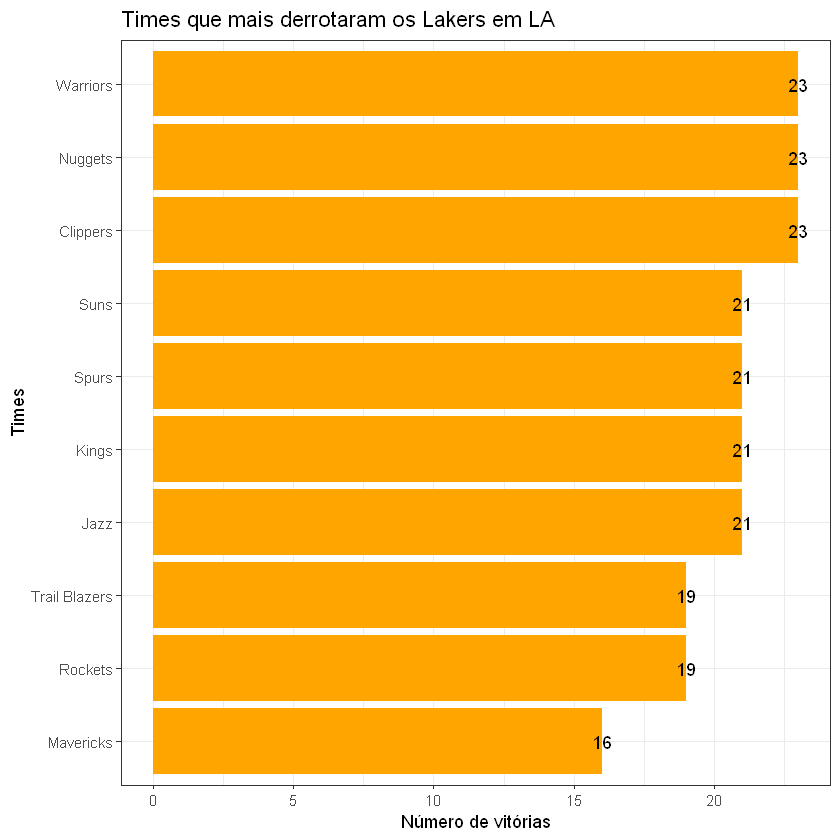

In [245]:
lakers_home <-games %>%
  group_by(HOME_TEAM_ID) %>% 
    select(HOME_TEAM_ID, TEAM_ID = VISITOR_TEAM_ID, HOME_TEAM_WINS) %>%
        filter(HOME_TEAM_ID==1610612747)
        

lakers_home_join <- inner_join(lakers_home, teams, by="TEAM_ID")
derrotas <- lakers_home_join %>% 
                filter(HOME_TEAM_WINS==0) %>%
                    mutate(AWAY_TEAM_WINS = 1) %>%
                       select(HOME_TEAM_ID, NICKNAME, AWAY_TEAM_WINS) %>%
                        group_by(NICKNAME) %>%
                         summarise(Derrotas = sum(AWAY_TEAM_WINS)) %>%
                            arrange(desc(Derrotas)) %>% slice(1:10)

derrotas %>%
    mutate(NICKNAME=fct_reorder(NICKNAME, Derrotas)) %>%
    ggplot(aes(x=NICKNAME, y=Derrotas)) +
    geom_bar(stat="identity", fill="orange") + 
    geom_text(aes(label=format(Derrotas)),  color="black") +
    coord_flip() +
    ggtitle("Times que mais derrotaram os Lakers em LA") +
    xlab("Times") +
    ylab("Número de vitórias") +
    theme_bw()

### Jogadores que mais vezes compuseram o elenco dos Lakers

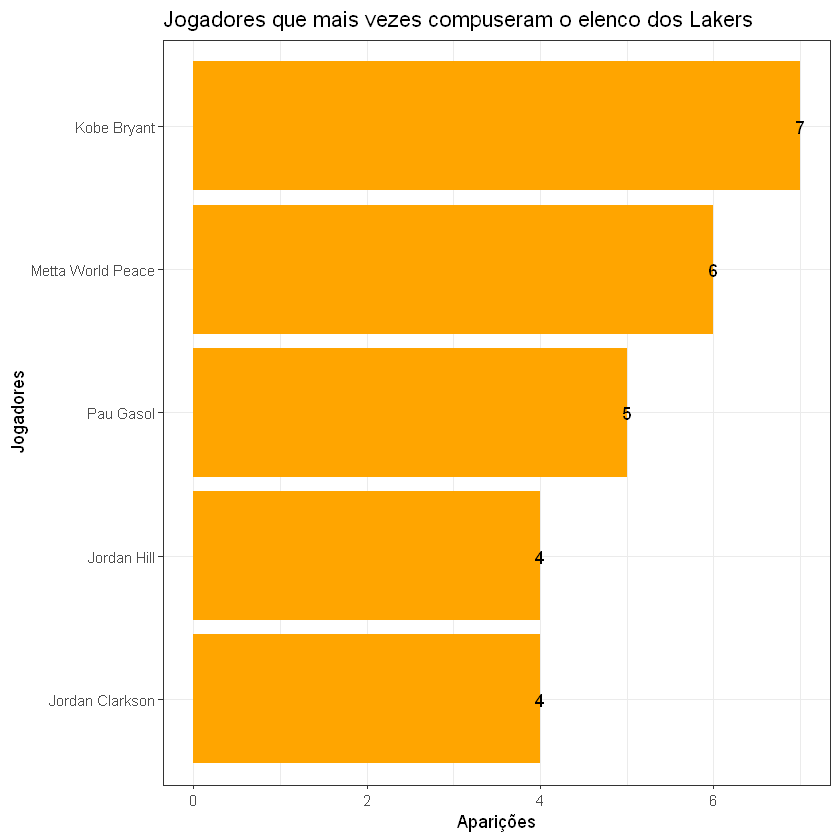

In [244]:
lakers_players <-players %>%
                    filter(TEAM_ID==1610612747) %>%
                        mutate(APARICAO = 1) %>%
                            group_by(PLAYER_NAME) %>%
                                summarise(APARICOES = sum(APARICAO)) %>%
                                    arrange(desc(APARICOES)) %>% slice(1:5)
lakers_players %>%
mutate(PLAYER_NAME=fct_reorder(PLAYER_NAME, APARICOES)) %>%
    ggplot(aes(x=PLAYER_NAME, y=APARICOES)) +
    geom_bar(stat="identity", fill="orange") + 
    geom_text(aes(label=format(APARICOES)),  color="black") +
    coord_flip() +
    ggtitle("Jogadores que mais vezes compuseram o elenco dos Lakers") +
    xlab("Jogadores") +
    ylab("Aparições") +
    theme_bw()

### Análise de Jogador - LeBron James

`summarise()` has grouped output by 'PLAYER_NAME'. You can override using the `.groups` argument.


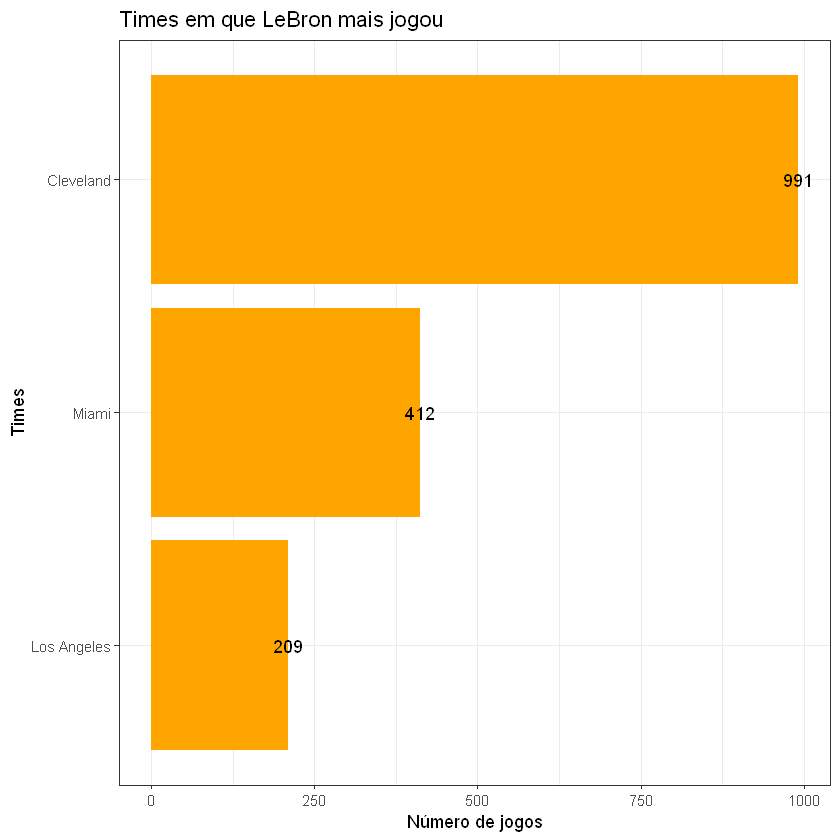

In [102]:
lebron_df <-games_details %>%
                inner_join(games,by="GAME_ID") %>%
                filter(SEASON>2003)%>%
                    filter(PLAYER_ID==2544) %>%
                        mutate(APARICAO = 1) %>%
                            group_by(PLAYER_NAME, TEAM_CITY) %>%
                                summarise(APARICOES = sum(APARICAO)) %>%
                                    arrange(desc(APARICOES)) 
lebron_df %>%
mutate(TEAM_CITY=fct_reorder(TEAM_CITY, APARICOES)) %>%
    ggplot(aes(x=TEAM_CITY, y=APARICOES)) +
    geom_bar(stat="identity", fill="orange") + 
    geom_text(aes(label=format(APARICOES)),  color="black") +
    coord_flip() +
    ggtitle("Times em que LeBron mais jogou") +
    xlab("Times") +
    ylab("Número de jogos") +
    theme_bw()             

In [101]:
lebron_df <-games_details %>%
              inner_join(games,by="GAME_ID") %>%
                mutate(APARICOES = 1) %>%
                filter(SEASON>2003)%>%
                    filter(PLAYER_ID==2544) %>%
                            group_by(PLAYER_NAME) %>%
                                summarise(GAMES = sum(APARICOES),PTS_MADE = sum(PTS, na.rm = TRUE), 
                                          MAX_PTS = max(PTS, na.rm = TRUE), 
                                          MIN_PTS=min(PTS, na.rm = TRUE),
                                             MEAN_PTS=round(mean(PTS, na.rm = TRUE),2),
                                                FG_PCT = sum(FGM, na.rm = TRUE)/sum(FGA, na.rm = TRUE),
                                                 FG3_PCT = sum(FG3M, na.rm = TRUE)/sum(FG3A, na.rm = TRUE)) %>%
                                    arrange(desc(PTS_MADE))
lebron_df

PLAYER_NAME,GAMES,PTS_MADE,MAX_PTS,MIN_PTS,MEAN_PTS,FG_PCT,FG3_PCT
LeBron James,1612,42412,61,1,27.1,0.506322,0.3453623


### Trabalho final

- Teste de Hipoteses e estatistica inferencial

Objetivo: Descobrir as caracteristicas que mais influenciam na vitória de um time.

-> Ponto 1: Vai ser analisado somente o que faz um time vencer uma partida, ou vencer o campeonato? -> Vencer partida <br>
-> Ponto 2: Elencar caracteristicas e estatisticas de times vencedores. 

Quais as características do time vencedor? 
- Jogou em casa ou fora influencia?
- Conferencia influencia (separar em tabelas de confs)? 
- Teve jogadores que marcaram triple-double? 
- Teve jogadores que marcaram double-double? 
- Tem estrela no time (O que é considerado um jogador estrela?)?
- Bola de 3 feita influencia?

Atividades:
- Montar tabelas de times que venceram e times que perderam
- Montar coluna de TD, DD, Estrela(PTS, REB, AST)

### Comparação Visitante e Anfitrião

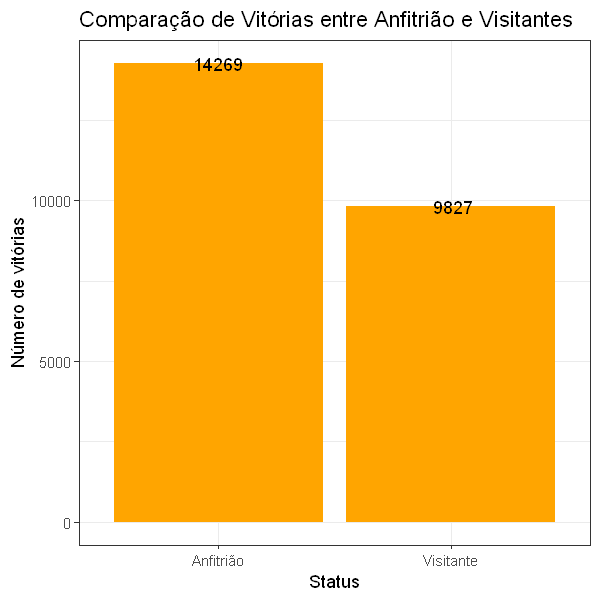

In [45]:
games_chart <- games %>%
                select(HOME_TEAM_WINS,PTS_home, PTS_away) %>%
                    filter(HOME_TEAM_WINS!='NA')%>%
                      mutate(WHO_WON = (if_else(PTS_home > PTS_away, "Anfitrião", "Visitante")),qtd=1) %>%
                        select(WHO_WON,qtd) %>%
                            filter(WHO_WON!='NA')%>%
                            group_by(WHO_WON) %>%
                                summarize(VITORIAS = sum(qtd))

options(repr.plot.width = 5, repr.plot.height = 5)
games_chart %>%
ggplot(aes(x=WHO_WON, y=VITORIAS)) +
    geom_bar(stat="identity", fill="orange") + 
    geom_text(aes(label=format(VITORIAS)),  color="black") +
    
    ggtitle("Comparação de Vitórias entre Anfitrião e Visitantes") +
    xlab("Status") +
    ylab("Número de vitórias") +
    theme_bw()

In [46]:
Table <- matrix(c(59.22,40.78,40.78,59.22), 2, 2, byrow = TRUE)
#Table <- matrix(c(14269,9827,9827,14269), 2, 2, byrow = TRUE)
dimnames(Table) <- list(rows = c("Ganhou", "Perdeu"), columns = c("Casa", "Fora"))
Table

Test <- chisq.test(Table)
Test
Test$expected
#H0 = Valores independentes
#H1 = Valores dependentes
# p-valor < 0,05 rejeita-se hipótese nula, ou seja, Jogar em casa influencia na vitória

,Casa,Fora
Ganhou,59.22,40.78
Perdeu,40.78,59.22



	Pearson's Chi-squared test with Yates' continuity correction

data:  Table
X-squared = 6.0831, df = 1, p-value = 0.01365


,Casa,Fora
Ganhou,50,50
Perdeu,50,50


### Comparação das demais estatísticas

In [224]:
names(games)

[1] "GAME_DATE_EST"    "GAME_ID"          "GAME_STATUS_TEXT" "HOME_TEAM_ID"    
 [5] "VISITOR_TEAM_ID"  "SEASON"           "TEAM_ID_home"     "PTS_home"        
 [9] "FG_PCT_home"      "FT_PCT_home"      "FG3_PCT_home"     "AST_home"        
[13] "REB_home"         "TEAM_ID_away"     "PTS_away"         "FG_PCT_away"     
[17] "FT_PCT_away"      "FG3_PCT_away"     "AST_away"         "REB_away"        
[21] "HOME_TEAM_WINS"

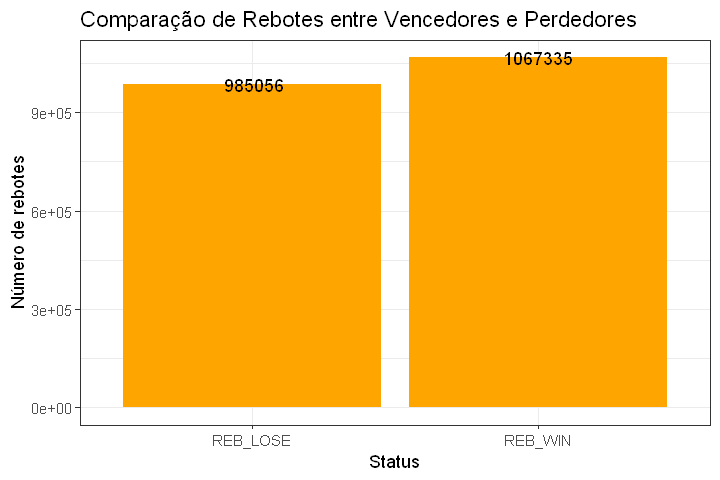

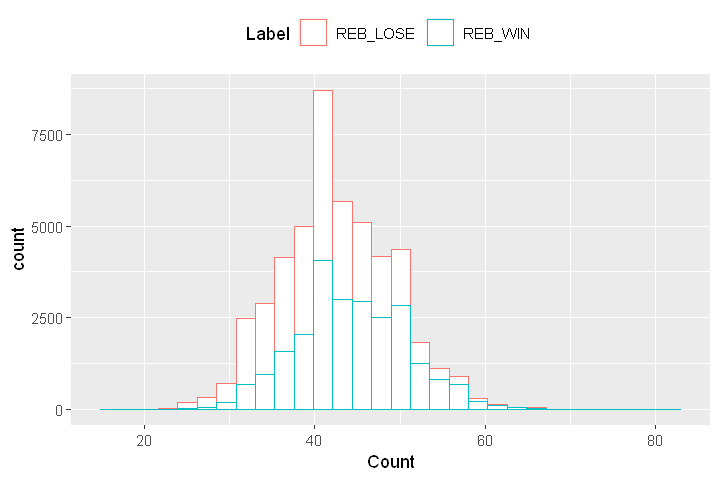

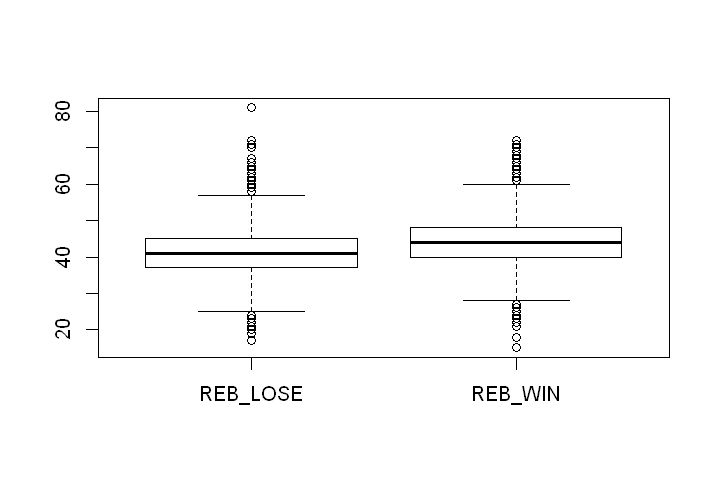

In [235]:
stats_chart <- games %>%
                select(HOME_TEAM_WINS, PTS_home, FG_PCT_home, FT_PCT_home, FG3_PCT_home, AST_home, REB_home,
                       PTS_away, FG_PCT_away, FT_PCT_away, FG3_PCT_away, AST_away, REB_away) %>%

                mutate(PTS_WIN = if_else(HOME_TEAM_WINS == 1, PTS_home, PTS_away)) %>%
                mutate(PTS_LOSE = if_else(HOME_TEAM_WINS == 0, PTS_home, PTS_away)) %>%

                mutate(FG_PCT_WIN = if_else(HOME_TEAM_WINS == 1, FG_PCT_home, FG_PCT_away)) %>%
                mutate(FG_PCT_LOSE = if_else(HOME_TEAM_WINS == 0, FG_PCT_home, FG_PCT_away)) %>%

                mutate(FT_PCT_WIN = if_else(HOME_TEAM_WINS == 1, FT_PCT_home, FT_PCT_away)) %>%
                mutate(FT_PCT_LOSE = if_else(HOME_TEAM_WINS == 0, FT_PCT_home, FT_PCT_away)) %>%

                mutate(FG3_PCT_WIN = if_else(HOME_TEAM_WINS == 1, FG3_PCT_home, FG3_PCT_away)) %>%
                mutate(FG3_PCT_LOSE = if_else(HOME_TEAM_WINS == 0, FG3_PCT_home, FG3_PCT_away)) %>%

                mutate(AST_WIN = if_else(HOME_TEAM_WINS == 1, AST_home, AST_away)) %>%
                mutate(AST_LOSE = if_else(HOME_TEAM_WINS == 0, AST_home, AST_away)) %>%

                mutate(REB_WIN = if_else(HOME_TEAM_WINS == 1, REB_home, REB_away)) %>%
                mutate(REB_LOSE = if_else(HOME_TEAM_WINS == 0, REB_home, REB_away)) %>%
                select(HOME_TEAM_WINS, PTS_WIN,PTS_LOSE,FG_PCT_WIN,FG_PCT_LOSE,FT_PCT_WIN,FT_PCT_LOSE,FG3_PCT_WIN,
                      FG3_PCT_LOSE,AST_WIN,AST_LOSE,REB_WIN,REB_LOSE)
                

chart_reb_win <- stats_chart %>% select(Count = REB_WIN) %>% filter(Count!='NA') %>% mutate(Label = 'REB_WIN')
chart_reb_lose <- stats_chart %>% select(Count = REB_LOSE) %>% filter(Count!='NA') %>% mutate(Label = 'REB_LOSE')

reb_chart <- rbind(chart_reb_win, chart_reb_lose)
#reb_chart

count_chart <- reb_chart %>% group_by(Label) %>% summarize(count = sum(Count))
count_chart %>%
ggplot(aes(x=Label, y=count)) +
    geom_bar(stat="identity", fill="orange") + 
    geom_text(aes(label=format(count)),  color="black") +
    ggtitle("Comparação de Rebotes entre Vencedores e Perdedores") +
    xlab("Status") +
    ylab("Número de rebotes") +
    theme_bw()

options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(reb_chart, aes(x=Count, color=Label)) +
geom_histogram(fill="white", bins=30) + theme(legend.position="top")

boxplot(chart_reb_lose$Count,chart_reb_win$Count,names=c("REB_LOSE","REB_WIN"))

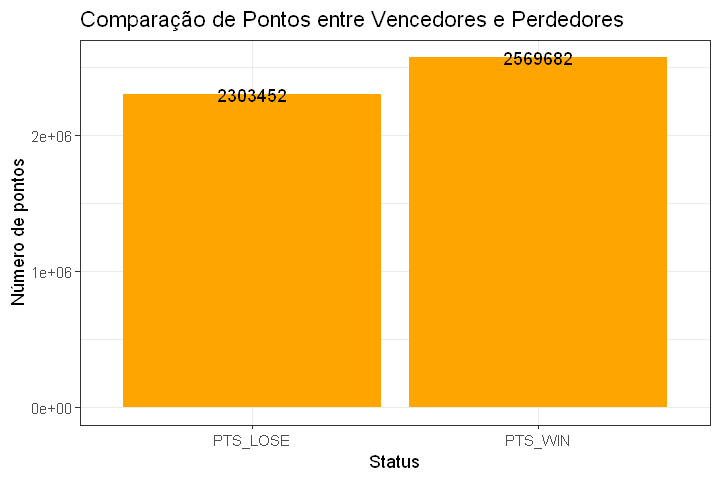

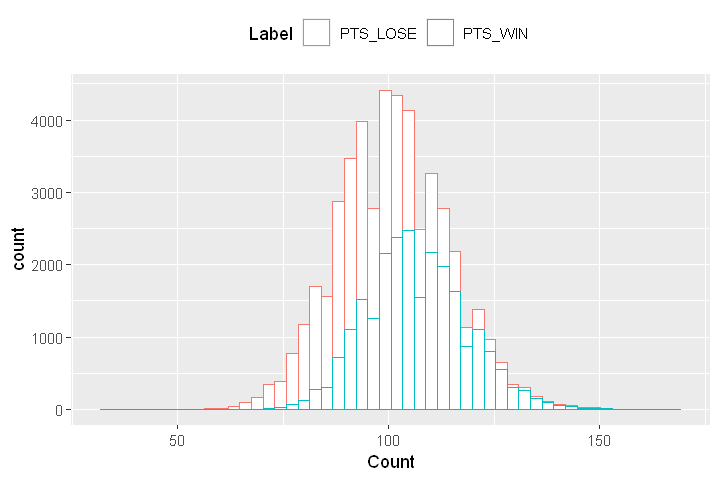

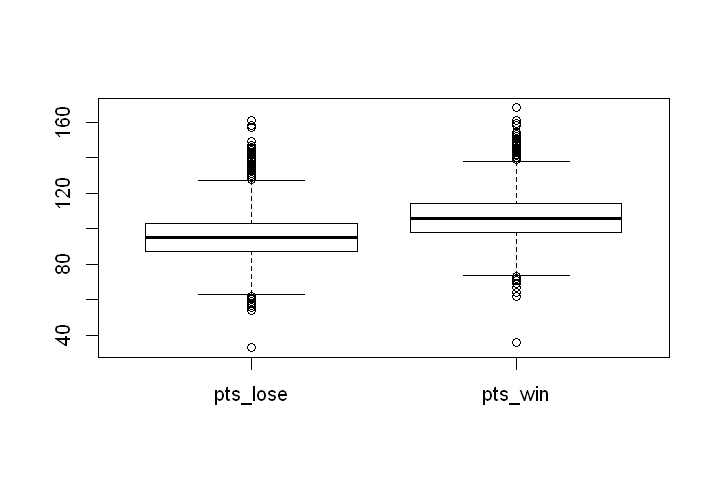

In [223]:
chart_pts_win <- stats_chart %>% select(Count = PTS_WIN) %>% filter(Count!='NA') %>% mutate(Label = 'PTS_WIN')
chart_pts_lose <- stats_chart %>% select(Count = PTS_LOSE) %>% filter(Count!='NA') %>% mutate(Label = 'PTS_LOSE')

pts_chart <- rbind(chart_pts_win, chart_pts_lose)
#reb_chart

count_chart <- pts_chart %>% group_by(Label) %>% summarize(count = sum(Count))
count_chart %>%
ggplot(aes(x=Label, y=count)) +
    geom_bar(stat="identity", fill="orange") + 
    geom_text(aes(label=format(count)),  color="black") +
    ggtitle("Comparação de Pontos entre Vencedores e Perdedores") +
    xlab("Status") +
    ylab("Número de pontos") +
    theme_bw()

options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(pts_chart, aes(x=Count, color=Label)) +
geom_histogram(fill="white", bins=50) + theme(legend.position="top")

boxplot(chart_pts_lose$Count, chart_pts_win$Count,names=c("pts_lose","pts_win"))

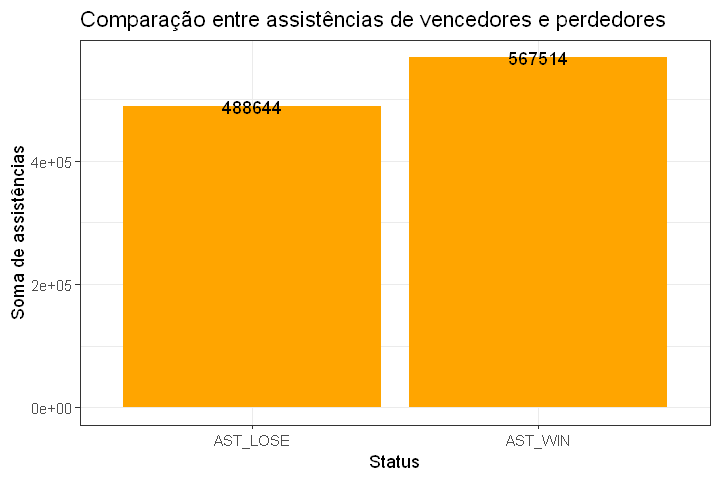

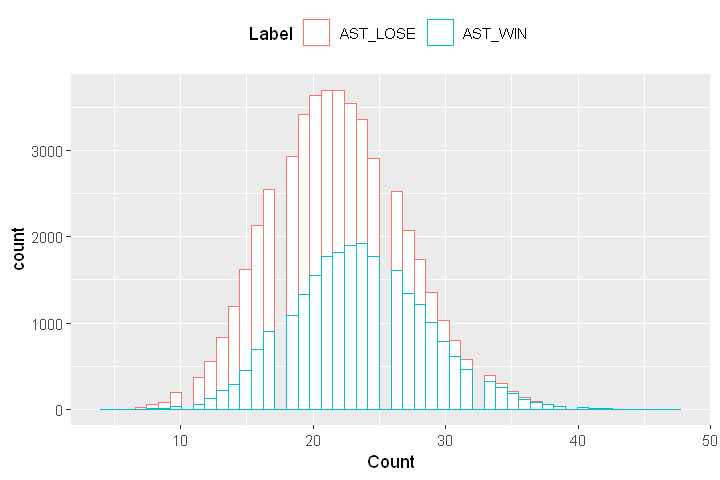

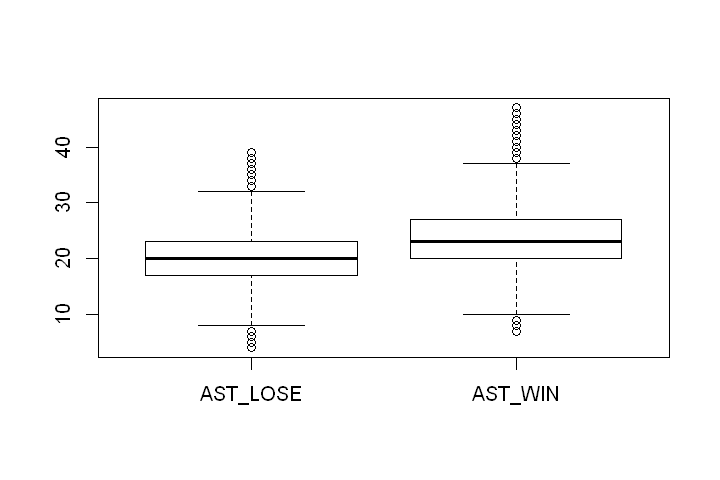

In [242]:

chart_pts_win <- stats_chart %>% select(Count = AST_WIN) %>% filter(Count!='NA') %>% mutate(Label = 'AST_WIN')
chart_pts_lose <- stats_chart %>% select(Count = AST_LOSE) %>% filter(Count!='NA') %>% mutate(Label = 'AST_LOSE')

pts_chart <- rbind(chart_pts_win, chart_pts_lose)
#reb_chart

count_chart <- pts_chart %>% group_by(Label) %>% summarize(count = sum(Count))
count_chart %>%
ggplot(aes(x=Label, y=count)) +
    geom_bar(stat="identity", fill="orange") + 
    geom_text(aes(label=format(count)),  color="black") +
    ggtitle("Comparação entre assistências de vencedores e perdedores") +
    xlab("Status") +
    ylab("Soma de assistências") +
    theme_bw()

options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(pts_chart, aes(x=Count, color=Label)) +
geom_histogram(fill="white", bins=50) + theme(legend.position="top")

boxplot(chart_pts_lose$Count, chart_pts_win$Count,names=c("AST_LOSE","AST_WIN"))


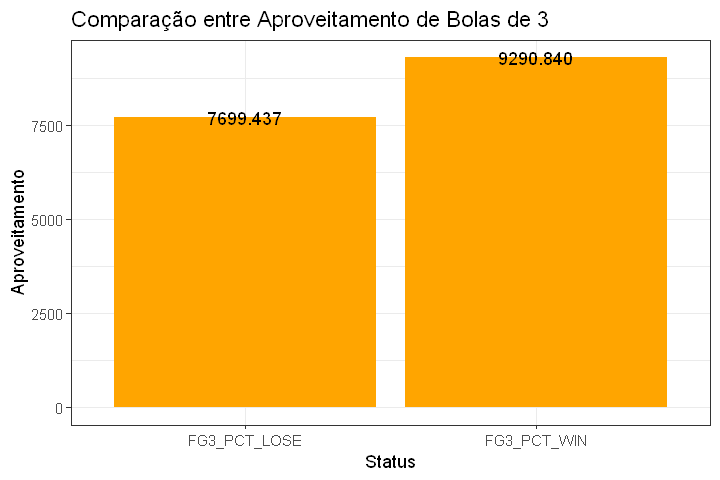

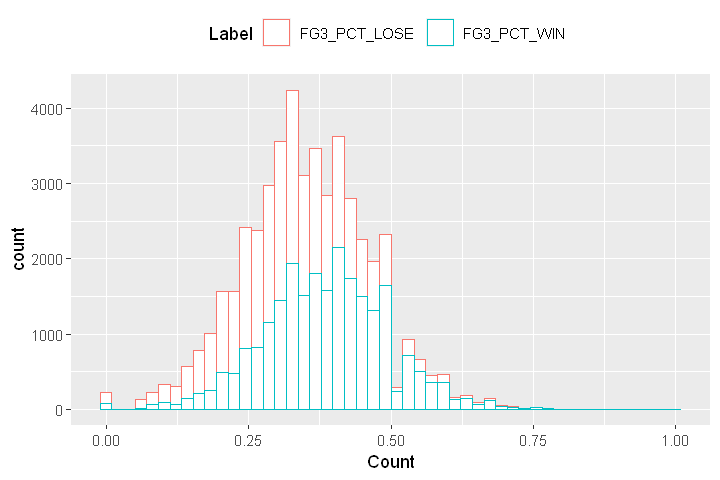

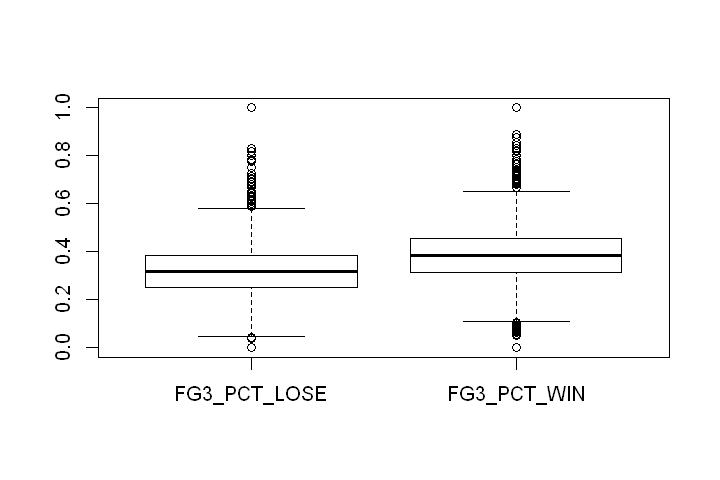

In [243]:
chart_pts_win <- stats_chart %>% select(Count = FG3_PCT_WIN) %>% filter(Count!='NA') %>% mutate(Label = 'FG3_PCT_WIN')
chart_pts_lose <- stats_chart %>% select(Count = FG3_PCT_LOSE) %>% filter(Count!='NA') %>% mutate(Label = 'FG3_PCT_LOSE')

pts_chart <- rbind(chart_pts_win, chart_pts_lose)
#reb_chart

count_chart <- pts_chart %>% group_by(Label) %>% summarize(count = sum(Count))
count_chart %>%
ggplot(aes(x=Label, y=count)) +
    geom_bar(stat="identity", fill="orange") + 
    geom_text(aes(label=format(count)),  color="black") +
    ggtitle("Comparação entre Aproveitamento de Bolas de 3") +
    xlab("Status") +
    ylab("Aproveitamento") +
    theme_bw()

options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(pts_chart, aes(x=Count, color=Label)) +
geom_histogram(fill="white", bins=50) + theme(legend.position="top")

boxplot(chart_pts_lose$Count, chart_pts_win$Count,names=c("FG3_PCT_LOSE","FG3_PCT_WIN"))

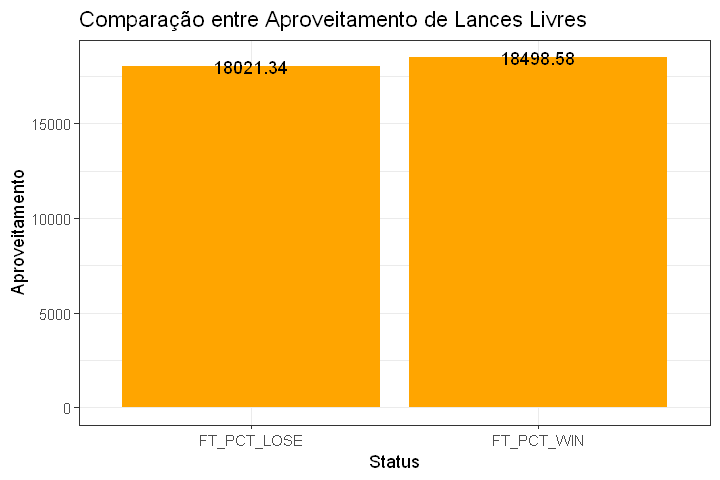

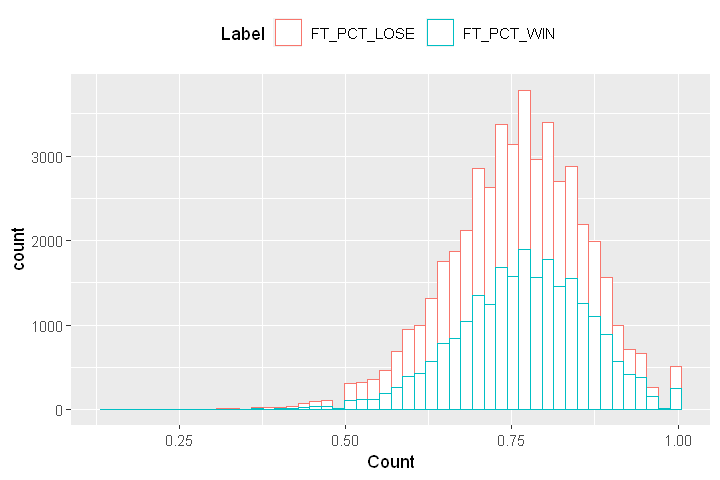

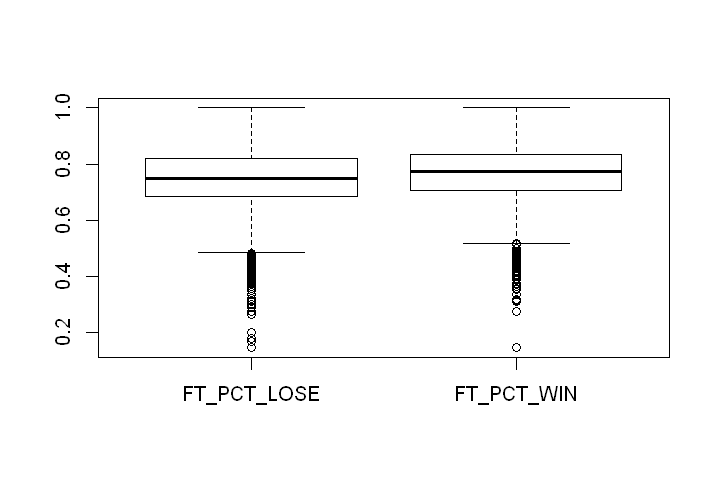

In [245]:
chart_pts_win <- stats_chart %>% select(Count = FT_PCT_WIN) %>% filter(Count!='NA') %>% mutate(Label = 'FT_PCT_WIN')
chart_pts_lose <- stats_chart %>% select(Count = FT_PCT_LOSE) %>% filter(Count!='NA') %>% mutate(Label = 'FT_PCT_LOSE')

pts_chart <- rbind(chart_pts_win, chart_pts_lose)
#reb_chart

count_chart <- pts_chart %>% group_by(Label) %>% summarize(count = sum(Count))
count_chart %>%
ggplot(aes(x=Label, y=count)) +
    geom_bar(stat="identity", fill="orange") + 
    geom_text(aes(label=format(count)),  color="black") +
    ggtitle("Comparação entre Aproveitamento de Lances Livres") +
    xlab("Status") +
    ylab("Aproveitamento") +
    theme_bw()

options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(pts_chart, aes(x=Count, color=Label)) +
geom_histogram(fill="white", bins=50) + theme(legend.position="top")

boxplot(chart_pts_lose$Count, chart_pts_win$Count,names=c("FT_PCT_LOSE","FT_PCT_WIN"))

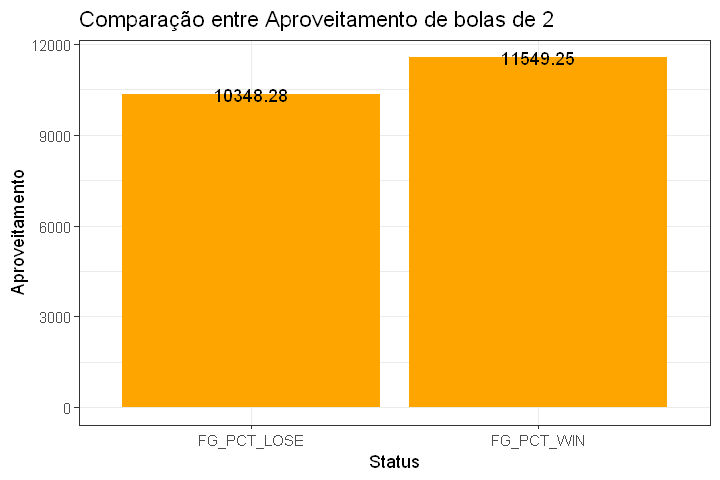

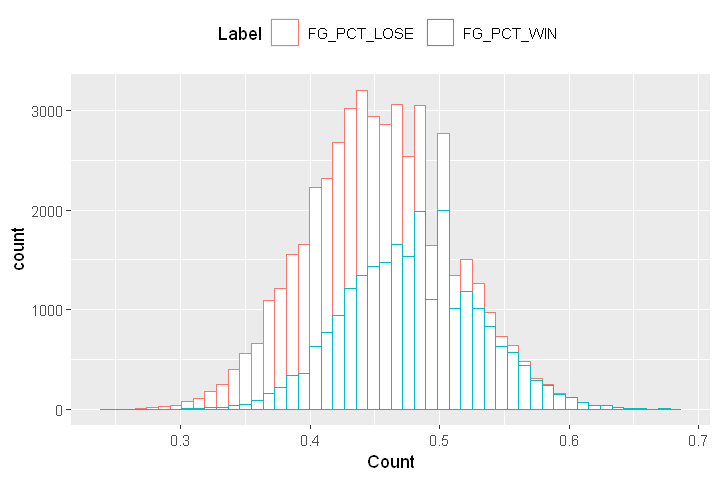

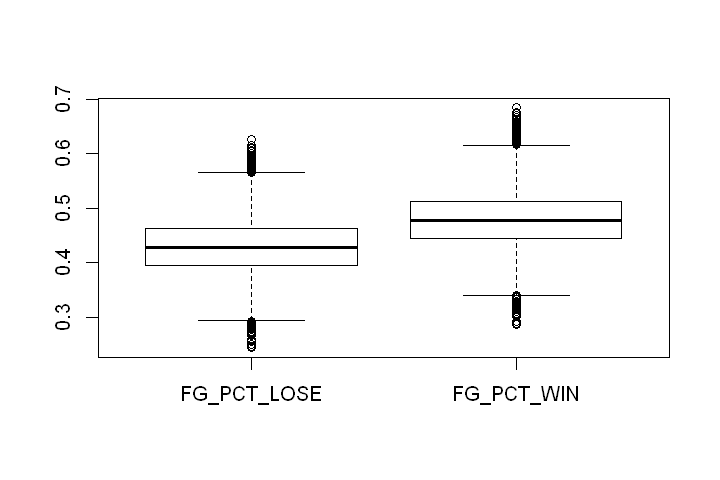

In [251]:
chart_pts_win <- stats_chart %>% select(Count = FG_PCT_WIN) %>% filter(Count!='NA') %>% mutate(Label = 'FG_PCT_WIN')
chart_pts_lose <- stats_chart %>% select(Count = FG_PCT_LOSE) %>% filter(Count!='NA') %>% mutate(Label = 'FG_PCT_LOSE')

pts_chart <- rbind(chart_pts_win, chart_pts_lose)
#reb_chart

count_chart <- pts_chart %>% group_by(Label) %>% summarize(count = sum(Count))
count_chart %>%
ggplot(aes(x=Label, y=count)) +
    geom_bar(stat="identity", fill="orange") + 
    geom_text(aes(label=format(count)),  color="black") +
    ggtitle("Comparação entre Aproveitamento de bolas de 2") +
    xlab("Status") +
    ylab("Aproveitamento") +
    theme_bw()

options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(pts_chart, aes(x=Count, color=Label)) +
geom_histogram(fill="white", bins=50) + theme(legend.position="top")

boxplot(chart_pts_lose$Count, chart_pts_win$Count,names=c("FG_PCT_LOSE","FG_PCT_WIN"))

### Análise da influência da conferência para vitória

In [248]:
ranking_conf <- ranking %>%
                    select(HOME_TEAM_ID=TEAM_ID, CONFERENCE)

ranking_conf = unique(ranking_conf)
#ranking_conf

dados<- inner_join(games, ranking_conf, by="HOME_TEAM_ID") %>%
            filter(!is.na(CONFERENCE)) %>%
                select(HOME_TEAM_WINS, CONFERENCE) %>%
                    group_by(CONFERENCE) %>%
                        summarise(Vitorias = sum(HOME_TEAM_WINS))%>%
                            mutate(freq_relativa = (Vitorias/ sum(Vitorias))*100 )
dados

CONFERENCE,Vitorias,freq_relativa
East,7271,49.49289
West,7420,50.50711


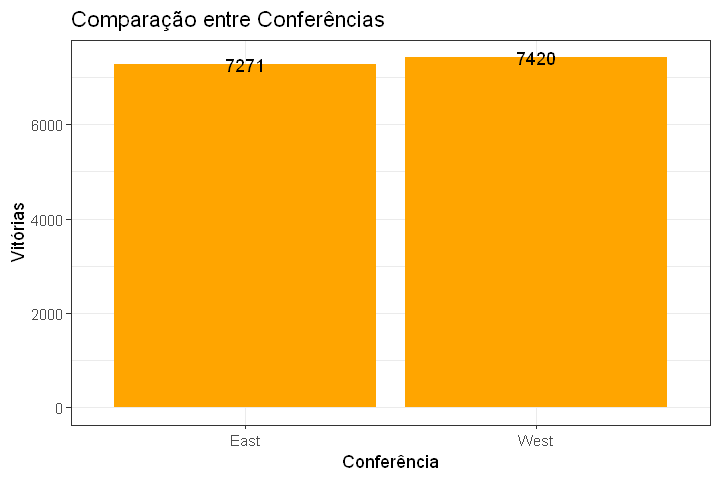

In [255]:
dados %>%
ggplot(aes(x=CONFERENCE, y=Vitorias)) +
    geom_bar(stat="identity", fill="orange") + 
    geom_text(aes(label=format(Vitorias)),  color="black") +
    ggtitle("Comparação entre Conferências") +
    xlab("Conferência") +
    ylab("Vitórias") +
    theme_bw()



In [44]:
Table <- matrix(c(49.49,50.50,50.50,49.49), 2, 2, byrow = TRUE)
dimnames(Table) <- list(rows = c("Ganhou", "Perdeu"), columns = c("East", "West"))
Table

Test <- chisq.test(Table)
Test
Test$expected # Expected

#H0 = Valores independentes
#H1 = Valores dependentes
#Como p-valor > 0,05 então não rejeita-se hipótese nula e a conferencia ao qual o time pertence não influencia na vitória

,East,West
Ganhou,49.49,50.50
Perdeu,50.50,49.49



	Pearson's Chi-squared test with Yates' continuity correction

data:  Table
X-squared = 2.0002e-06, df = 1, p-value = 0.9989


,East,West
Ganhou,49.995,49.995
Perdeu,49.995,49.995


### Análise de triplos duplos para vitória

In [239]:
games_df <- games %>% 
                select(GAME_ID, HOME_TEAM_ID, VISITOR_TEAM_ID, HOME_TEAM_WINS)
#games_df

dados<- inner_join(games_details, games_df, by="GAME_ID") %>%
            mutate(IS_HOME = factor(if_else(TEAM_ID == HOME_TEAM_ID, 1, 0))) %>%
              mutate(WIN = factor(if_else((HOME_TEAM_WINS == 1 & IS_HOME == 1)|(HOME_TEAM_WINS == 0 & IS_HOME == 0), 1, 0))) %>%
                mutate(TR_Double = factor(if_else((PTS>9 & REB>9 & AST > 9), 'SIM', 'NAO')))

dt_vitorias <- dados %>%
                filter(WIN == 1)

dt_derrotas <- dados %>%
                filter(WIN == 0)

In [7]:
vitoria_td <- dt_vitorias %>%
            select(TR_Double) %>%
                group_by(TR_Double) %>%
                        summarise(TR_Double_ref = tabulate(TR_Double))


derrota_td <- dt_derrotas %>%
                select(TR_Double) %>%
                    group_by(TR_Double) %>%
                        summarise(TR_Double_ref = tabulate(TR_Double))
vitoria_td
derrota_td

`summarise()` has grouped output by 'TR_Double'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'TR_Double'. You can override using the `.groups` argument.


TR_Double,TR_Double_ref
NAO,252363
SIM,0
SIM,821
NA,0


TR_Double,TR_Double_ref
NAO,253105
SIM,0
SIM,312
NA,0


In [203]:
Table <- matrix(c(821,252363,312,253105), 2, 2, byrow = TRUE)
dimnames(Table) <- list(rows = c("Ganhou", "Perdeu"), columns = c("Fez TD", "Não fez TD"))
Table

Test <- chisq.test(Table)
Test
Test$expected # Expected

#H0 = Valores independentes
#H1 = Valores dependentes
#Como p-valor > 0,05 então não rejeita-se hipótese nula 

,Fez TD,Não fez TD
Ganhou,821,252363
Perdeu,312,253105



	Pearson's Chi-squared test with Yates' continuity correction

data:  Table
X-squared = 228.75, df = 1, p-value < 2.2e-16


,Fez TD,Não fez TD
Ganhou,566.2395,252617.8
Perdeu,566.7605,252850.2
